In [1]:
print('Hello world')

Hello world


## Build a basic chatbot with langraph (graph Api)

In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages



In [3]:
class State(TypedDict): # inheriting typedict as it is going to return typedict 
    # Messages have the type 'list'. The `add_messages` function.
    # In the annotation defines. How the state key should be updated.
    # In this case, it appends messages to the list, rather than overwriting them.
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)


In [4]:
graph_builder

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model
llm = ChatGroq(model="llama3-8b-8192") # option 1 of initialization of llm

In [7]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x759835925550>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x759835926120>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
llm = init_chat_model("groq:llama3-8b-8192") # option 2 of initialization of llm
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7598359d2210>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7598359d2c10>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [9]:
# Node functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}


In [10]:
# adding a node in the bot
graph_builder.add_node("llmchatbot",chatbot)
# adding a edge to the bot start 
graph_builder.add_edge(START,"llmchatbot")
# adding a edge to the end of the bot
graph_builder.add_edge("llmchatbot",END)

# compiling the graph
graph = graph_builder.compile()


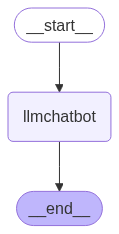

In [11]:
## Visualize the graph
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [25]:
s =f'What is (a+b)^3'
response = graph.invoke({'messages':s})

In [26]:
print(response['messages'][-1].content)

A simple but useful question!

The formula for expanding a binomial cube is:

(a + b)^3 = a^3 + 3a^2b + 3ab^2 + b^3

So, (a + b)^3 is the sum of four terms:

1. a^3 (the cube of a)
2. 3a^2b (a squared times b)
3. 3ab^2 (a times b squared)
4. b^3 (the cube of b)

This formula can be used to expand any binomial expression raised to the power of 3.


In [14]:
for event in graph.stream({"messages":"Hi How are you?"}):
    for value in event.values():
        print(value['messages'][-1].content)

I'm just a language model, I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help you with any questions or tasks you have! How can I assist you today?


In [29]:
def ask_quiz(topic:str):
    message_str = f'Create a quiz of 10 questions regarding topic ${topic} and please return the quiz in json string with 4 Options of each question with that return a json string containing only answer with serial question number.'
    response= graph.invoke({'messages':message_str})
    return response

In [31]:
res = ask_quiz('Digital wAtch')

In [33]:
print(res['messages'][-1].content)

Here is a quiz on the topic of Digital Watch with 10 questions and 4 options for each question. The quiz is returned as a JSON string in the format you requested.

```
{
  "quiz": [
    {
      "question": "What is the primary function of a digital watch?",
      "options": ["To make phone calls", "To send text messages", "To display time and date", "To play music"],
      "answer": 2
    },
    {
      "question": "What type of display does a digital watch typically have?",
      "options": ["Analog hands", "Digital numerals", "Analog hands and digital numerals", "A mirror"],
      "answer": 1
    },
    {
      "question": "What is the most common type of battery used in digital watches?",
      "options": ["Alkaline", "Mercury", "Lithium", "Nickel Cadmium"],
      "answer": 3
    },
    {
      "question": "What is the typical resolution of a digital watch's display?",
      "options": ["Low resolution", "Medium resolution", "High resolution", "Ultra-high resolution"],
      "answer